In [1]:
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch 
from torchmetrics import F1Score
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torchvision.transforms import Resize
import helper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import os
from torch.utils.data import RandomSampler, DataLoader, Subset, SubsetRandomSampler, RandomSampler


from Net import *
from Model import *
from PlanktonLoader import *
from tool_box import *

%load_ext autoreload
%autoreload 2

In [2]:
# pre-processing
data_folder = '/Users/nounou/Desktop/EPFL/M5/Project I/Code/ZooScanSet'
image_size = (128,128)
normalize = ((0.5), (0.5))
unwanted_classes = ['seaweed','badfocus__Copepoda','artefact','badfocus__artefact','bubble','detritus','fiber__detritus','egg__other','multiple__other']
transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(), transforms.Normalize(*normalize)])

dataset = PlanktonLoader(data_folder+'/taxa.csv', data_folder+"/imgs/", unwanted_classes ,transform)

#sampling and train-test split
sampling_factor = .01
train_factor = .8
shuffle = True
random_seed= 42
batch_size = 16

trainloader_dataset, testloader_dataset = PlanktonLoader.build_loaders(dataset, sampling_factor, train_factor, batch_size, random_seed= 41, shuffle_dataset= True)


 The id list has a lenght of  703821
Folder list corresponds to classes of interes
We have  84 classes
We use  0.01 of the data ( 7038 samples) and the train factor is  0.8
Train set contains 5630 images.
Test set contains 1408 images.


<generator object Module.parameters at 0x160065dd0>
Epoch [0], train_loss: 2.4687, val_loss: 2.2247, val_acc: 0.4517,  val_f1_score: 0.4517
Epoch [1], train_loss: 1.8915, val_loss: 2.1285, val_acc: 0.4879,  val_f1_score: 0.4879
Epoch [2], train_loss: 1.5075, val_loss: 2.2216, val_acc: 0.4901,  val_f1_score: 0.4901
Epoch [3], train_loss: 1.1702, val_loss: 2.4824, val_acc: 0.5156,  val_f1_score: 0.5156
Epoch [4], train_loss: 0.9118, val_loss: 2.7865, val_acc: 0.5000,  val_f1_score: 0.5000
Epoch [5], train_loss: 0.7051, val_loss: 2.9261, val_acc: 0.4744,  val_f1_score: 0.4744


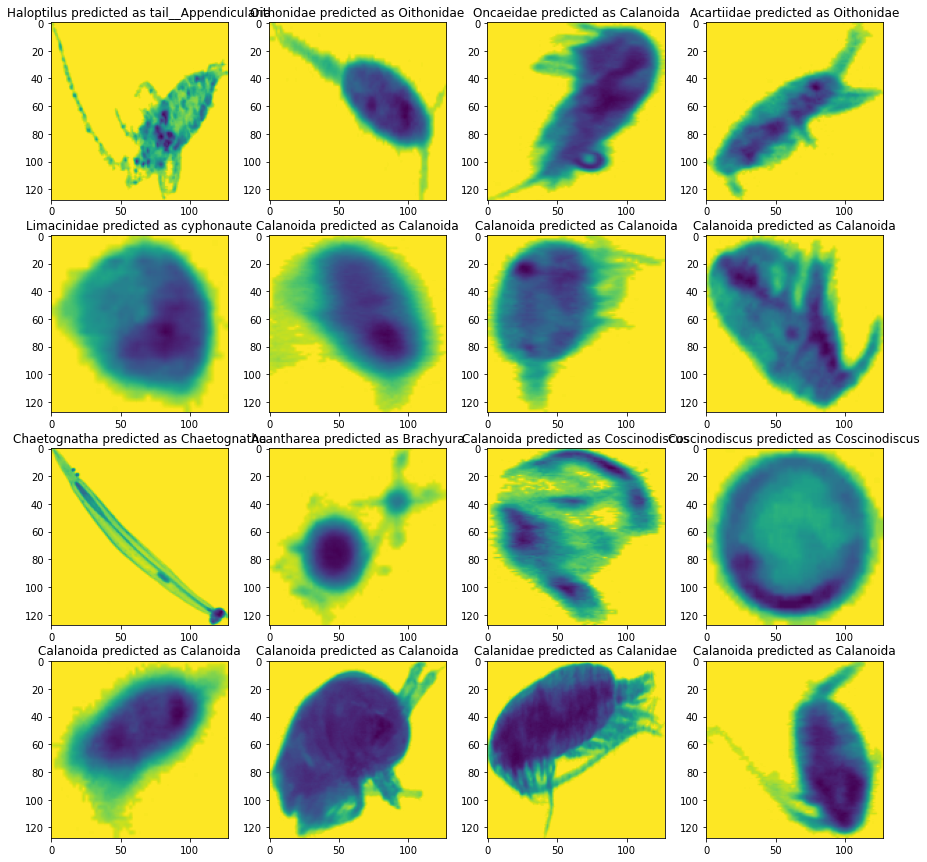

10 good predictions. Accuracy :  0.625


In [6]:
num_epochs = 6
lr = 0.001
opt_func = torch.optim.Adam
net = Net()
net.initialize_weights()
model = ImageClassificationBase()

history = ImageClassificationBase.fit(model, num_epochs, lr, net, trainloader_dataset, testloader_dataset, opt_func)
torch.save(net.state_dict(), data_folder+'/last_model.pth')
Plot.plot_random_output(testloader_dataset, dataset, net)


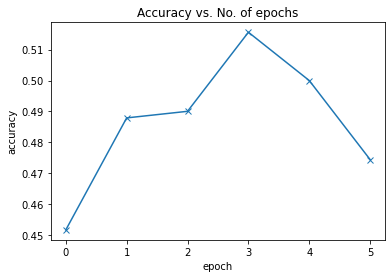

In [7]:
Plot.plot_accuracies(history)

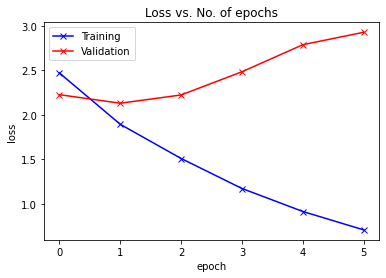

In [8]:
Plot.plot_losses(history)


In [12]:
df = Plot.class_accuracies(Plot, net, dataset, testloader_dataset)


Class # 0   Neoceratium trained on 16.0 times -> accuracy : 0.5625
Class # 1   Noctiluca trained on 192.0 times -> accuracy : 0.5208333333333334
Class # 2   Phaeodaria trained on 464.0 times -> accuracy : 0.4956896551724138
Class # 3   Acantharea trained on 48.0 times -> accuracy : 0.5625
Class # 4   Foraminifera trained on 192.0 times -> accuracy : 0.5364583333333334
Class # 5   Spumellaria trained on 16.0 times -> accuracy : 0.5
Class # 6   Coscinodiscus trained on 400.0 times -> accuracy : 0.52
Class # 7   Annelida trained on 96.0 times -> accuracy : 0.4479166666666667
Class # 8   larvae__Annelida was never trained on
Class # 9   Tomopteridae was never trained on
Class # 10   Evadne trained on 560.0 times -> accuracy : 0.4642857142857143
Class # 11   Podon trained on 32.0 times -> accuracy : 0.53125
Class # 12   Penilia trained on 176.0 times -> accuracy : 0.45454545454545453
Class # 13   larvae__Crustacea was never trained on
Class # 14   Gammaridea was never trained on
Class # 15 

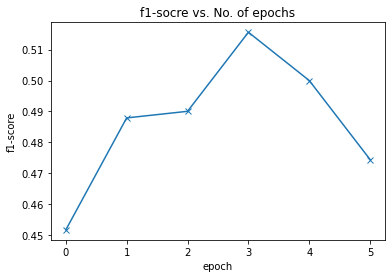

In [11]:
Plot.plot_f1(history)